In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import os, glob, re
import h5py

In [2]:
data_path = '/home/llg/Dropbox/CHUM/RECHERCHE/2024 CTA COW/vox2vox/data/data for registered and resampled volumes/train/train'

In [3]:
ims = glob.glob(os.path.join(data_path, '*.im'))
print(f'Number of images: {len(ims)}')
segs = glob.glob(os.path.join(data_path, '*.seg'))
print(f'Number of segmentations: {len(segs)}')

Number of images: 68
Number of segmentations: 68


In [4]:
# sample 
im_sample= h5py.File(ims[0], 'r')
im_sample = np.array(im_sample['CTs'])
print(f'Image shape: {im_sample.shape}')
seg_sample= h5py.File(segs[0], 'r')
seg_sample = np.array(seg_sample['MRs'])
print(f'Segmentation shape: {seg_sample.shape}')

Image shape: (256, 256, 200)
Segmentation shape: (256, 256, 200)


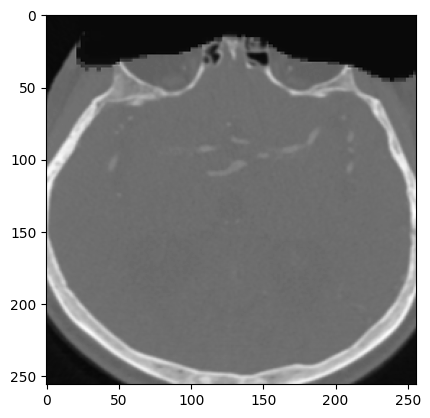

In [6]:
def plot_slices(data, slice = 100):
    """ Function to plot row of image slices """
    im = data[..., slice].T
    plt.imshow(im, cmap='gray')
    plt.show()

plot_slices(im_sample, slice = 100)

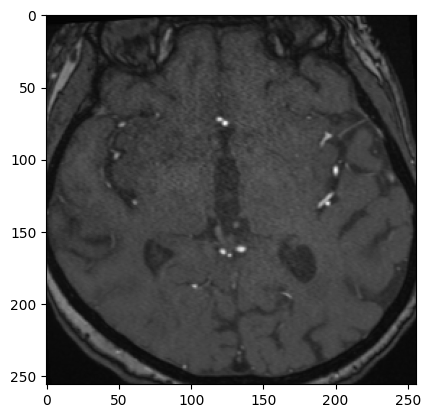

In [7]:
plot_slices(seg_sample,slice = 100)

In [61]:
# use interact to 1. select patient with a dropdown and 2 select slice with a slider
from ipywidgets import interact, fixed
def plot_slices(data, slice):
    """ Function to plot row of image slices """
    im = data[..., slice].T
    plt.imshow(im, cmap='gray')
    plt.show()

def select_patient(patient):
    im = h5py.File(ims[patient], 'r')
    im = np.array(im['CTs'])
    seg = h5py.File(segs[patient], 'r')
    seg = np.array(seg['MRs'])
    interact(plot_slices, data = fixed(im), slice = (0, im.shape[-1]-1, 1))
    interact(plot_slices, data = fixed(seg), slice = (0, seg.shape[-1]-1, 1))
 
   
# ipywidgets interact need to sync im and seg


# interact(select_patient, patient = (0, len(ims)-1, 1))


In [60]:
interact(plot_slices, data = fixed(im_sample), slice = (0, im_sample.shape[-1]-1, 1))

interactive(children=(IntSlider(value=100, description='slice', max=199), Output()), _dom_classes=('widget-int…

<function __main__.plot_slices(data, slice=100)>